In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image
from pathlib import Path  
from PIL import Image  
from wordcloud import WordCloud, ImageColorGenerator  
import jieba
from collections import Counter
import matplotlib.font_manager as fm

In [33]:
plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#sns.set(font='Arial Unicode MS', font_scale=1.0)

# 获取系统中已安装的中文字体名称
font_path = fm.findfont(fm.FontProperties(family='SimHei'))

In [3]:
file_path='./data/范特西fantasy.csv'

In [4]:
df = pd.read_csv(file_path)
df

user_name  star         comment_time  vote  \
0          锐利修蕊   5.0  2017-10-07 10:14:51  2540   
1          素手纤纤   5.0  2007-10-08 04:08:36  1824   
2            郁程   5.0  2007-12-04 10:44:27  1236   
3     DeerColin   5.0  2012-11-16 19:11:09   433   
4        九亿少男的梦   5.0  2015-06-19 22:25:38   381   
..          ...   ...                  ...   ...   
215         大科学   5.0  2013-06-19 18:51:55     0   
216   马达[mǎ dá]   4.0  2013-06-26 21:39:33     0   
217  jeffchuwei   5.0  2010-03-09 17:56:12     1   
218        芥末蘸酱   5.0  2009-09-30 15:07:36     0   
219      潘粤萌大表妹   5.0  2013-07-08 12:08:29     1   

                                                 short  
0                                      周杰伦的第二张真是牛逼到没朋友  
1                                  十年来我只给两张专辑打满分，这是其一。  
2                                   划时空的专辑音乐史上的里程碑专辑奇迹  
3    第二张专辑依旧很高的品质，甚至可以说是他最经典的专辑（没有之一）。周杰伦和方文山这对完美组合...  
4                        我对历史一窍不通，但是我知道古巴比伦王颁布了汉摩拉比宝典。  
..                                                 ...  
215  从不同政府层次看，越是较低一级政府越要强化公共服务职能，淡化经济职能。这是地方政府职能转变的...  
216                          高中时候听的。貌似还有一张卡带在家里.......  
217                               没法说的一张专辑周杰伦只存在于这张专辑中  
218                                          开始接触流行音乐。  
219                                  留学生在旁边课间放简单爱，我就哭了  

[220 rows x 5 columns]

In [5]:
df_star = df.groupby(['star'])['star'].count()
df_star

star
1.0      1
3.0      2
4.0     39
5.0    169
Name: star, dtype: int64

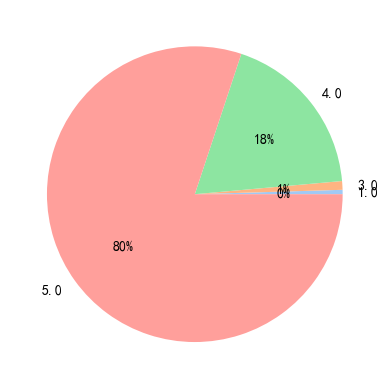

In [6]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_star, labels = df_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.show()

In [11]:
df_date = df.copy()
df_date['comment_time']=pd.to_datetime(df_date['comment_time']).dt.strftime('%Y')
month_count=df_date.groupby(['comment_time'])['comment_time'].count()
month_count.index

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='comment_time')

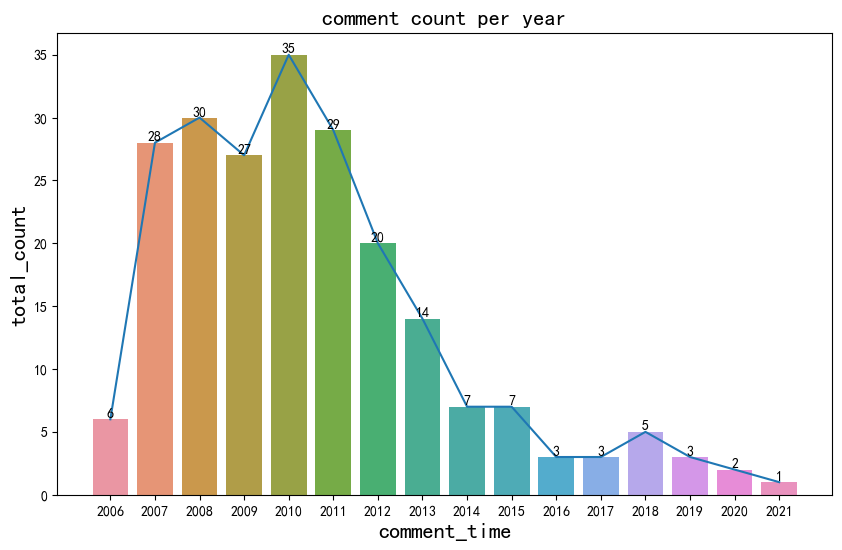

In [14]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('comment count per year', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('total_count', fontsize=16)
ax1 = sns.barplot(x=month_count.index, y = list(month_count))
ax1.tick_params(axis='y')
ax1.bar_label(ax1.containers[0])
ax2 = sns.lineplot(x=month_count.index, y = list(month_count))
ax2.tick_params(axis='y')

In [38]:
df_date.sort_values(by=['vote'],ascending=False).iloc[:10]

user_name  star comment_time  vote  \
0        锐利修蕊   5.0         2017  2540   
1        素手纤纤   5.0         2007  1824   
2          郁程   5.0         2007  1236   
3   DeerColin   5.0         2012   433   
4      九亿少男的梦   5.0         2015   381   
5        Bill   5.0         2007   253   
7        一只麦麦   5.0         2010   203   
8         文泽尔   4.0         2007   146   
11   V.Dunham   5.0         2015   118   
6       tlmgt   4.0         2011   100   

                                                short  
0                                     周杰伦的第二张真是牛逼到没朋友  
1                                 十年来我只给两张专辑打满分，这是其一。  
2                                  划时空的专辑音乐史上的里程碑专辑奇迹  
3   第二张专辑依旧很高的品质，甚至可以说是他最经典的专辑（没有之一）。周杰伦和方文山这对完美组合...  
4                       我对历史一窍不通，但是我知道古巴比伦王颁布了汉摩拉比宝典。  
5                              首首经典难以超越的高度且不仅仅只对周杰伦而言  
7   准确说是从这张开始爱上周杰伦的，每每听到爱在西元前前奏响起眼泪都要夺眶而出，仿佛回到初中午休...  
8                                  这其实应该是周杰伦最好的一张专辑了吧  
11                          他永远不会泯然众人矣的原因就在于他本来就不是众人。  
6               现在觉得这张的整体性上做得并不是那么好。前三张最爱的还是《八度空间》无疑。

In [18]:
top5=df_date.sort_values(by=['vote'],ascending=False).iloc[:5].reset_index()
stopwords = set()
content = [line.strip() for line in open('cn_stopwords.txt','r').readlines()]
stopwords.update(content)

In [19]:
def split_text(text):  

    words =jieba.cut(text)

    # 用Counter方法计算单词频率数
    count = Counter(words)
    most_count = count.most_common()
    words_list = []

    for i in most_count:
        if len(i[0]) == 2:
            words_list.append(i[0])

    return words_list

In [34]:
def draw_wordcloud(text):  
# draw_wordcloud函数用来画图
    wordcloud = WordCloud(background_color = 'white', 
                          max_words = 1000,
                          stopwords=stopwords,
                          font_path = font_path
                          )

    wordcloud.generate(text)


    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [22]:
text_list=[]
for i in range(5):
    text_list.append(split_text(text = df_date.iloc[i]['short']))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\彭天泽\AppData\Local\Temp\jieba.cache
Loading model cost 0.815 seconds.
Prefix dict has been built successfully.


In [23]:
text_final_list=[]
for i in range(5):
    text_raw=text_list[i]
    txt_final=''
    for txt in text_raw:
        txt_final+=txt
        txt_final+=','
    text_final_list.append(txt_final)

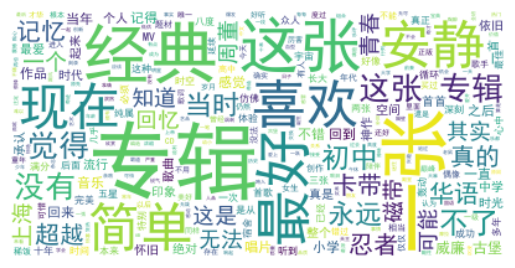

In [36]:
textall=''
for i in range(df_date.shape[0]):
    tmplist=split_text(text = df_date.iloc[i]['short'])
    for item in tmplist:
        textall+=item
        textall+=','

draw_wordcloud(text = textall) 

In [42]:
from snownlp import SnowNLP

# 定义情感分类函数
def get_sentiment(text):
    s = SnowNLP(text)
    sentiment = s.sentiments
    if sentiment > 0.5:
        return 'Positive'
    elif sentiment < 0.5:
        return 'Negative'
    else:
        return 'Neutral'

# 在DataFrame中添加情感分类列
df['sentiment'] = df['short'].apply(get_sentiment)

# 对比评论星数和情感分类
rating_sentiment_counts = df.groupby(['star', 'sentiment']).size().unstack(fill_value=0)

# 打印对比结果
print(rating_sentiment_counts)

sentiment  Negative  Neutral  Positive
star                                  
1.0               1        0         0
3.0               0        0         2
4.0              15        1        23
5.0              49        2       118
